In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")

In [17]:
import torch
import numpy as np
import networkx as nx
import os

In [18]:
results_dir = "../results/2021-08-05_07-11_dist_dense_tuning3"

results1 = torch.load(os.path.join(results_dir, "rho_1_results.pt"), map_location=torch.device("cpu"))
results2 = torch.load(os.path.join(results_dir, "rho_05_results.pt"), map_location=torch.device("cpu"))
results3 = torch.load(os.path.join(results_dir, "rho_01_results.pt"), map_location=torch.device("cpu"))
results_solo = torch.load(os.path.join(results_dir, "solo_results.pt"), map_location=torch.device("cpu"))


# Communication Graph

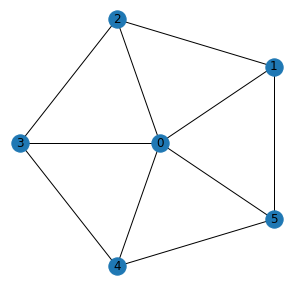

In [19]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss

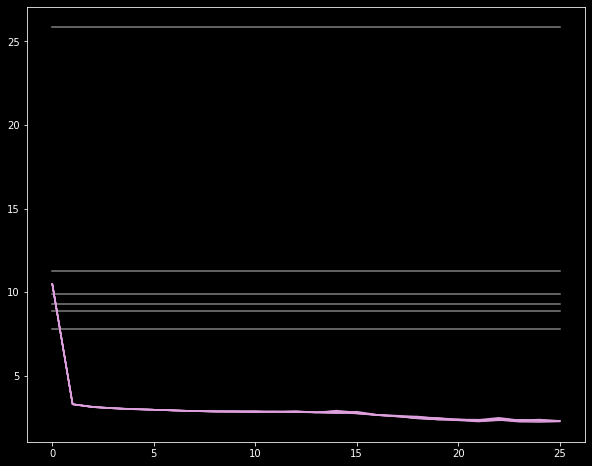

In [25]:
vl1 = torch.stack(results1["validation_loss"])
vl2 = torch.stack(results2["validation_loss"])
vl3 = torch.stack(results3["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 8))

t = np.arange(vl1.shape[0])

for i in results_solo.keys():
    ax.plot(t, results_solo[i]["validation_loss"] * np.ones_like(t), color="gray")

ax.plot(vl1, color="plum")
#ax.plot(vl2, color="limegreen")
#ax.plot(vl3, color="royalblue")
#ax.set_yscale("log")

# Density Plots

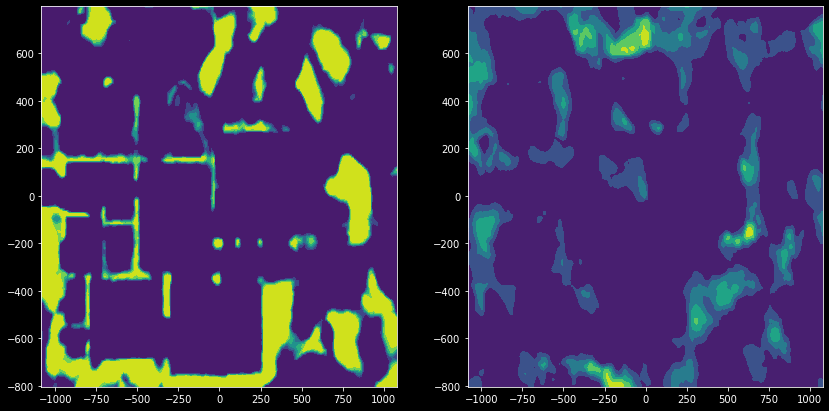

In [24]:
dens = results1["mesh_grid_density"]
locs = results1["mesh_inputs"]

agent = 3
solo_dens = results_solo[agent]["mesh_grid_density"]

(fig, (ax0, ax1)) = plt.subplots(ncols=2, figsize=(14, 7))

ax0.tricontourf(locs[:, 0], locs[:, 1], torch.squeeze(solo_dens))

z = (torch.squeeze(dens[-1]))[agent, :]
ax1.tricontourf(locs[:, 0], locs[:, 1], z)

# Denisty Animation

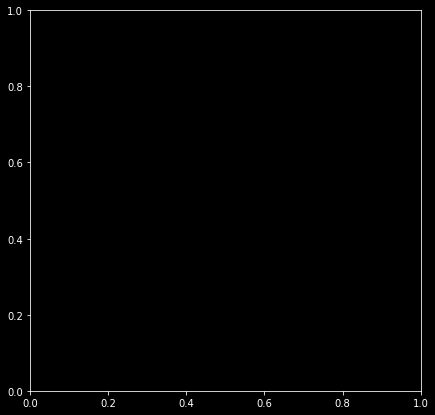

In [22]:
dens1 = results1["mesh_grid_density"]
locs = results1["mesh_inputs"]

num_frames = len(dens1)
agent = 0

(fig, ax) = plt.subplots(figsize=(7, 7))

def animate(i):
    global cont
    z = (torch.squeeze(dens1[i]))[agent, :]
    ax.tricontourf(locs[:, 0], locs[:, 1], z)
    ax.set_title("frame = {}".format(i))

anim = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=True)
#anim.save("density_animation.mp4")

In [26]:
vl1

tensor([[10.4743, 10.4743, 10.4743, 10.4743, 10.4743, 10.4743],
        [ 3.2816,  3.2873,  3.2883,  3.2805,  3.2872,  3.2823],
        [ 3.1102,  3.1169,  3.1255,  3.1142,  3.1403,  3.1103],
        [ 3.0415,  3.0582,  3.0555,  3.0373,  3.0395,  3.0423],
        [ 2.9837,  3.0003,  2.9880,  2.9944,  2.9947,  2.9821],
        [ 2.9576,  2.9564,  2.9572,  2.9570,  2.9569,  2.9586],
        [ 2.9070,  2.9115,  2.9041,  2.9139,  2.9375,  2.9189],
        [ 2.8706,  2.8720,  2.8799,  2.8876,  2.8680,  2.8804],
        [ 2.8429,  2.8469,  2.8457,  2.8681,  2.8716,  2.8509],
        [ 2.8383,  2.8404,  2.8387,  2.8727,  2.8680,  2.8418],
        [ 2.8330,  2.8298,  2.8315,  2.8357,  2.8850,  2.8220],
        [ 2.8420,  2.8443,  2.8398,  2.8387,  2.8414,  2.8487],
        [ 2.8255,  2.8140,  2.8624,  2.8350,  2.8673,  2.8107],
        [ 2.7952,  2.7920,  2.7896,  2.7993,  2.8057,  2.8015],
        [ 2.7585,  2.7968,  2.9052,  2.8631,  2.7793,  2.7715],
        [ 2.7830,  2.7297,  2.7950,  2.7